In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from scipy.stats import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

In [3]:
print("number of rows is " , len(df))
print(df.isna().sum())
print(df.dtypes)
df.head()

number of rows is  891
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The length of the dataset is 891 and more than a half have no cabin data. Also, the age parameter has many lost data. Age data could be one of the most important parameters to determine who lives and who dies.
To solve the 'Age' cleaning, firstly let's do an exploratory analysis on the Name: Mr, Miss, Mrs...

In [4]:
def f(row):
    if ( 'Mr.' in row['Name']):
        return 'Mr'
    elif ( 'Mrs' in row['Name']):
        return 'Mrs'
    elif ( 'Miss. ' in row['Name']):
        return 'Miss'
    elif ( 'Master. ' in row['Name']):
        return 'Master'
    else:
        return 'Other'
df['honorifics'] = df.apply(f, axis=1)
df_test['honorifics'] = df_test.apply(f, axis=1)

df['Mr'] = np.where(df['honorifics'] == 'Mr',1,0)
df['Mrs'] = np.where(df['honorifics'] == 'Mrs',1,0)
df['Miss'] = np.where(df['honorifics'] == 'Miss',1,0)
df['Master'] = np.where(df['honorifics'] == 'Master',1,0)
df['Other_honor'] = np.where(df['honorifics'] == 'Other',1,0)

df_test['Mr'] = np.where(df_test['honorifics'] == 'Mr',1,0)
df_test['Mrs'] = np.where(df_test['honorifics'] == 'Mrs',1,0)
df_test['Miss'] = np.where(df_test['honorifics'] == 'Miss',1,0)
df_test['Master'] = np.where(df_test['honorifics'] == 'Master',1,0)
df_test['Other_honor'] = np.where(df_test['honorifics'] == 'Other',1,0)

                mean    count
            Survived Survived
honorifics                   
Master      0.575000       40
Miss        0.700000      180
Mr          0.156673      517
Mrs         0.790698      129
Other       0.400000       25


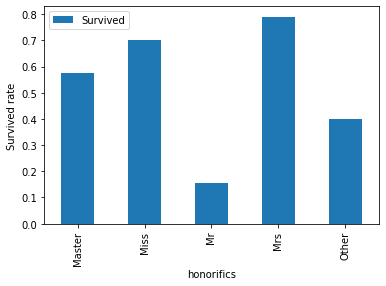

In [5]:
print(df.pivot_table(index = 'honorifics',values = 'Survived', aggfunc = ['mean', 'count']))
df.pivot_table(index = 'honorifics', values = 'Survived', aggfunc = 'mean').plot(kind = 'bar', width = 0.5,xlabel = 'honorifics', ylabel = 'Survived rate')
plt.show()

# General men and Reverends are more likely to die than other groups

                mean    count
            Survived Survived
honorifics                   
Master      0.500000        4
Miss        0.611111       36
Mr          0.117647      119
Mrs         0.823529       17
Other       0.000000        1


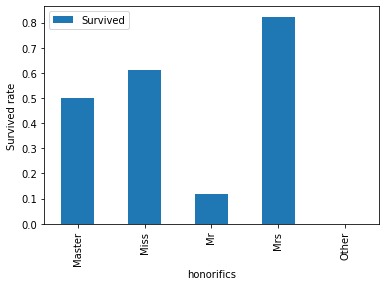

            mean            count     
Sex       female      male female male
Pclass                                
1       1.000000  0.238095      9   21
2       1.000000  0.222222      2    9
3       0.595238  0.095745     42   94


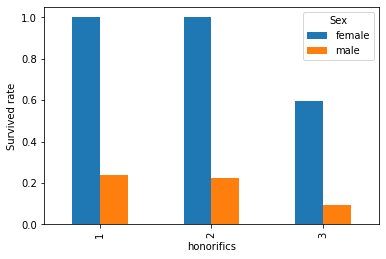

            mean            count     
Sex       female      male female male
Pclass                                
1       0.968085  0.368852     94  122
2       0.921053  0.157407     76  108
3       0.500000  0.135447    144  347


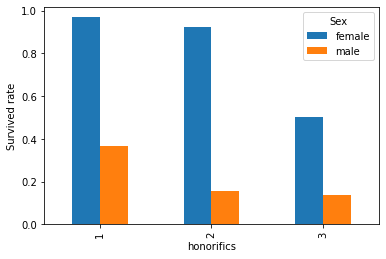

In [6]:
print(df[df['Age'].isna()].pivot_table(index = 'honorifics', values = 'Survived',aggfunc = ['mean', 'count']))
df[df['Age'].isna()].pivot_table(index = 'honorifics', values = 'Survived', aggfunc = 'mean').plot(kind = 'bar', width = 0.5,xlabel = 'honorifics', ylabel = 'Survived rate')
plt.show()
print(df[df['Age'].isna()].pivot_table(index = 'Pclass', columns = 'Sex', values = 'Survived',aggfunc = ['mean', 'count']))
df[df['Age'].isna()].pivot_table(index = 'Pclass', columns = 'Sex', values = 'Survived', aggfunc = 'mean').plot(kind = 'bar', width = 0.5,xlabel = 'honorifics', ylabel = 'Survived rate')
plt.show()
print(df.pivot_table(index = 'Pclass', columns = 'Sex', values = 'Survived',aggfunc = ['mean', 'count']))
df.pivot_table(index = 'Pclass', columns = 'Sex', values = 'Survived', aggfunc = 'mean').plot(kind = 'bar', width = 0.5,xlabel = 'honorifics', ylabel = 'Survived rate')
plt.show()

The sex is not a key factor, but the honorific title could be relevant. The missing age values are ploted as the average for the honorific title group. However, the class is also taken in consideration.

There were much more male than female at the ship. Men were much more likely to die.

In [7]:
df['female'] = np.where(df['Sex'] == 'female',1,0)
df['male'] = np.where(df['Sex'] == 'male',1,0)

df_test['female'] = np.where(df_test['Sex'] == 'female',1,0)
df_test['male'] = np.where(df_test['Sex'] == 'male',1,0)

891


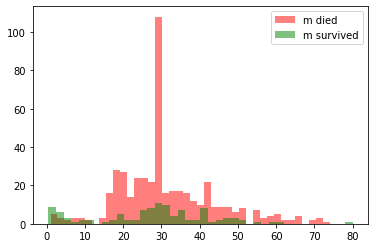

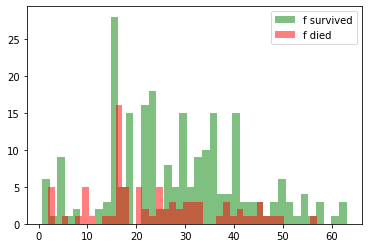

In [8]:
def f(row):
    if (np.isnan(row['Age']) == 1 ):
        a = df[df['honorifics'] == row['honorifics']]
        return a[a['Pclass'] == row['Pclass']]['Age'].mean()
    else:
        return row['Age']
    
df['Age'] = df.apply(f, axis=1)
df_test['Age'] = df_test.apply(f, axis=1)
print(df['Age'].isna().count())
plt.hist(df[df['male'] == 1 ].loc[df['Survived']== 0]['Age'], bins = 40, color = 'red', alpha = 0.5, label = 'm died')
plt.hist(df[df['male'] == 1 ].loc[df['Survived']== 1]['Age'], bins = 40, color = 'green', alpha = 0.5, label = 'm survived')

plt.legend()
plt.show()

plt.hist(df[df['female'] == 1 ].loc[df['Survived']== 1]['Age'], bins = 40, color = 'green', alpha = 0.5, label = 'f survived')
plt.hist(df[df['female'] == 1 ].loc[df['Survived']== 0]['Age'], bins = 40, color = 'red', alpha = 0.5, label = 'f died')

plt.legend()
plt.show()


df['young'] = np.where(df['Age'] < 30, 1 , 0)
df_test['young'] = np.where(df_test['Age'] < 30, 1 , 0)

The performance between male and female is significantly different so both are included in the table.

            mean    count
        Survived Survived
Pclass                   
1       0.629630      216
2       0.472826      184
3       0.242363      491


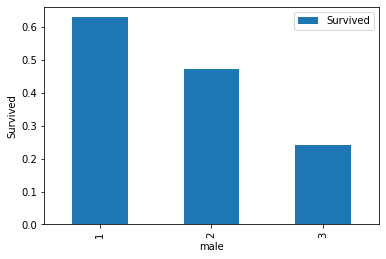

            mean                     count          
Pclass         1         2         3     1    2    3
male                                                
0       0.968085  0.921053  0.500000    94   76  144
1       0.368852  0.157407  0.135447   122  108  347


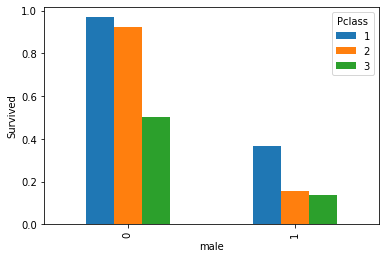

In [9]:
x_1 = df.loc[df['Pclass']== 1]
x_2 = df.loc[df['Pclass']== 2]
x_3 = df.loc[df['Pclass']== 3]

print(df.pivot_table(index = 'Pclass',values = 'Survived', aggfunc = ['mean', 'count']))
df.pivot_table(index = 'Pclass', values = 'Survived', aggfunc = 'mean').plot(kind = 'bar',  xlabel = 'male', ylabel = 'Survived')
plt.show()

print(df.pivot_table(index = 'male', columns = 'Pclass',values = 'Survived', aggfunc = ['mean', 'count']))
df.pivot_table(index = 'male', columns = 'Pclass', values = 'Survived', aggfunc = 'mean').plot(kind = 'bar',  xlabel = 'male', ylabel = 'Survived')
plt.show()

df['Pclass1'] = np.where(df['Pclass'] == 1, 1 , 0)
df['Pclass2'] = np.where(df['Pclass'] == 2, 1 , 0)
df['Pclass3'] = np.where(df['Pclass'] == 3, 1 , 0)

df_test['Pclass1'] = np.where(df_test['Pclass'] == 1, 1 , 0)
df_test['Pclass2'] = np.where(df_test['Pclass'] == 2, 1 , 0)
df_test['Pclass3'] = np.where(df_test['Pclass'] == 3, 1 , 0)

Third class people were more likely to die than any other class. Female third class were more likable to die than first and second but second class men died almost with the same probability as third class.

              mean    count
          Survived Survived
Embarked                   
C         0.553571      168
Q         0.389610       77
S         0.336957      644


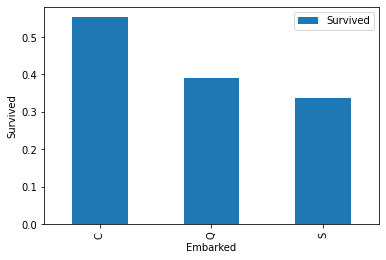

              mean                     count          
Pclass           1         2         3     1    2    3
Embarked                                              
C         0.694118  0.529412  0.378788    85   17   66
Q         0.500000  0.666667  0.375000     2    3   72
S         0.582677  0.463415  0.189802   127  164  353


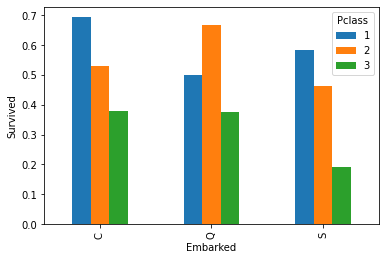

In [10]:
print(df.pivot_table(index = 'Embarked',values = 'Survived', aggfunc = ['mean', 'count']))
df.pivot_table(index = 'Embarked', values = 'Survived', aggfunc = 'mean').plot(kind = 'bar',  xlabel = 'Embarked', ylabel = 'Survived')
plt.show()

print(df.pivot_table(index = 'Embarked', columns = 'Pclass',values = 'Survived', aggfunc = ['mean', 'count']))
df.pivot_table(index = 'Embarked', columns = 'Pclass',values = 'Survived', aggfunc = 'mean').plot(kind = 'bar',  xlabel = 'Embarked', ylabel = 'Survived')
plt.show()

df['Embarked-C'] = np.where(df['Embarked'] == 'C', 1 , 0)
df['Embarked-Q'] = np.where(df['Embarked'] == 'Q', 1 , 0)
df['Embarked-S'] = np.where(df['Embarked'] == 'S', 1 , 0)

df_test['Embarked-C'] = np.where(df_test['Embarked'] == 'C', 1 , 0)
df_test['Embarked-Q'] = np.where(df_test['Embarked'] == 'Q', 1 , 0)
df_test['Embarked-S'] = np.where(df_test['Embarked'] == 'S', 1 , 0)

The port where people embarked does not seems to be a key factor but it will be evaluated later.

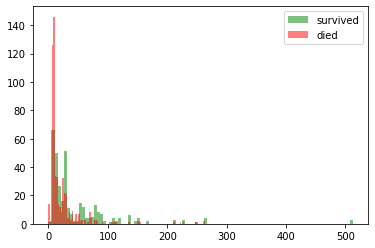

In [11]:
x_s = df.loc[df['Survived']== 1]
x_d = df.loc[df['Survived']== 0]
plt.hist(x_s['Fare'], bins = 100, color = 'green', alpha = 0.5, label = 'survived')
plt.hist(x_d['Fare'], bins = 100, color = 'red', alpha = 0.5, label = 'died')
plt.legend()
plt.show()
df['Expensive'] = np.where(df['Fare'] >= 20 ,1,0)
df['very_Expensive'] = np.where(df['Fare'] <= 70 ,1,0)

df_test['Expensive'] = np.where(df_test['Fare'] >= 20 ,1,0)
df_test['very_Expensive'] = np.where(df_test['Fare'] <= 70 ,1,0)

           mean           count     
male          0         1     0    1
SibSp                               
0      0.787356  0.168203   174  434
1      0.754717  0.310680   106  103
2      0.769231  0.200000    13   15
3      0.363636  0.000000    11    5
4      0.333333  0.083333     6   12
5      0.000000  0.000000     1    4
8      0.000000  0.000000     3    4


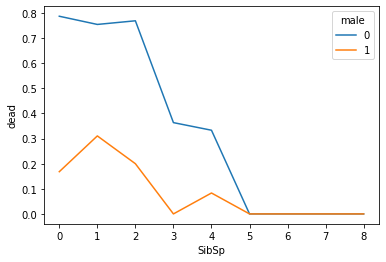

In [12]:
print(df.pivot_table(index = 'SibSp', columns = 'male',values = 'Survived', aggfunc = ['mean', 'count']))
df.pivot_table(index = 'SibSp', columns = 'male', values = 'Survived', aggfunc = 'mean').plot(xlabel = 'SibSp', ylabel = 'dead')
plt.show()

Having more than 3 siblings + spose at the ship increases dramatically the survival rate.

            mean                      count              
Pclass         1         2         3      1      2      3
Parch                                                    
0       0.607362  0.358209  0.225722  163.0  134.0  381.0
1       0.677419  0.750000  0.363636   31.0   32.0   55.0
2       0.761905  0.812500  0.255814   21.0   16.0   43.0
3            NaN  1.000000  0.333333    NaN    2.0    3.0
4       0.000000       NaN  0.000000    1.0    NaN    3.0
5            NaN       NaN  0.200000    NaN    NaN    5.0
6            NaN       NaN  0.000000    NaN    NaN    1.0


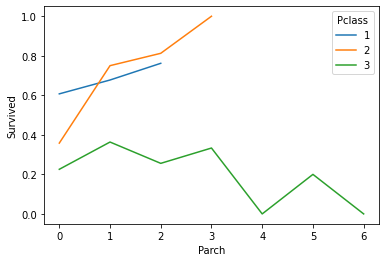

           mean            count       
Sex      female      male female   male
Parch                                  
0      0.788660  0.165289  194.0  484.0
1      0.766667  0.327586   60.0   58.0
2      0.612245  0.322581   49.0   31.0
3      0.750000  0.000000    4.0    1.0
4      0.000000  0.000000    2.0    2.0
5      0.250000  0.000000    4.0    1.0
6      0.000000       NaN    1.0    NaN


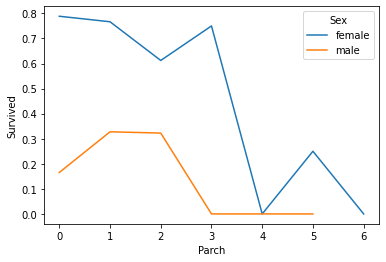

In [13]:
print(df.pivot_table(index = 'Parch', columns = 'Pclass',values = 'Survived', aggfunc = ['mean', 'count']))
df.pivot_table(index = 'Parch', columns = 'Pclass', values = 'Survived', aggfunc = 'mean').plot(xlabel = 'Parch', ylabel = 'Survived')
plt.show()

print(df.pivot_table(index = 'Parch', columns = 'Sex',values = 'Survived', aggfunc = ['mean', 'count']))
df.pivot_table(index = 'Parch', columns = 'Sex', values = 'Survived', aggfunc = 'mean').plot(xlabel = 'Parch', ylabel = 'Survived')
plt.show()

Only some third class people had more than 3 partnet + children at the ship. For first and second class more children could mean more chances of survival. 

                  mean    count
              Survived Survived
cabin_letter                   
A             0.466667       15
B             0.744681       47
C             0.593220       59
D             0.757576       33
E             0.750000       32
F             0.615385       13
G             0.500000        4
T             0.000000        1
U             0.299854      687


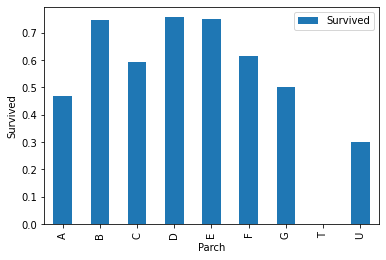

In [14]:
df['Cabin'] = df['Cabin'].fillna('Unknown')
df['cabin_letter'] = df['Cabin'].str[0]
df_test['Cabin'] = df_test['Cabin'].fillna('Unknown')
df_test['cabin_letter'] = df_test['Cabin'].str[0]
print(df.pivot_table(index = 'cabin_letter',values = 'Survived', aggfunc = ['mean', 'count']))
df.pivot_table(index = 'cabin_letter', values = 'Survived', aggfunc = 'mean').plot(kind = 'bar', xlabel = 'Parch', ylabel = 'Survived')
plt.show()
df['cabin_known_A'] = np.where(df['cabin_letter'] == 'A',1,0)
df['cabin_known_B'] = np.where(df['cabin_letter'] == 'B',1,0)
df['cabin_known_C'] = np.where(df['cabin_letter'] == 'C',1,0)
df['cabin_known_D'] = np.where(df['cabin_letter'] == 'D',1,0)
df['cabin_known_E'] = np.where(df['cabin_letter'] == 'E',1,0)
df['cabin_known_F'] = np.where(df['cabin_letter'] == 'F',1,0)
df['cabin_known_G'] = np.where(df['cabin_letter'] == 'G',1,0)
df['cabin_known_T'] = np.where(df['cabin_letter'] == 'T',1,0)
df['cabin_known_U'] = np.where(df['cabin_letter'] == 'U',1,0)

df_test['cabin_known_A'] = np.where(df_test['cabin_letter'] == 'A',1,0)
df_test['cabin_known_B'] = np.where(df_test['cabin_letter'] == 'B',1,0)
df_test['cabin_known_C'] = np.where(df_test['cabin_letter'] == 'C',1,0)
df_test['cabin_known_D'] = np.where(df_test['cabin_letter'] == 'D',1,0)
df_test['cabin_known_E'] = np.where(df_test['cabin_letter'] == 'E',1,0)
df_test['cabin_known_F'] = np.where(df_test['cabin_letter'] == 'F',1,0)
df_test['cabin_known_G'] = np.where(df_test['cabin_letter'] == 'G',1,0)
df_test['cabin_known_T'] = np.where(df_test['cabin_letter'] == 'T',1,0)
df_test['cabin_known_U'] = np.where(df_test['cabin_letter'] == 'U',1,0)


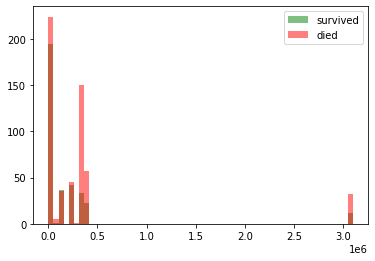

In [15]:
df['Ticket_numeric'] = df['Ticket'].str.split(" ").str[0]
df['Ticket_number'] = df['Ticket'].str.split(" ").str[-1]#.isnumeric() #.astype(int)

df_test['Ticket_numeric'] = df_test['Ticket'].str.split(" ").str[0]
df_test['Ticket_number'] = df_test['Ticket'].str.split(" ").str[-1]#.isnumeric() #.astype(int)

def h(row):
    if (row['Ticket_numeric'].isnumeric() == True ):
        return 1
    else:
        return 0
df['Ticket_numeric'] = df.apply(h, axis=1)


def f(row):
    if (row['Ticket_number'].isnumeric() == True ):
        return int(row['Ticket_number'])
    else:
        return 0
df['Ticket_number'] = df.apply(f, axis=1)
df_test['Ticket_number'] = df_test.apply(f, axis=1)


plt.hist(df[df['Survived']== 1]['Ticket_number'], bins = 60 , color = 'green', alpha = 0.5, label = 'survived')
plt.hist(df[df['Survived']== 0]['Ticket_number'], bins = 60 , color = 'red', alpha = 0.5, label = 'died')
plt.legend()
plt.show()
df.head()


def g(row):
    if (row['Ticket_number'] >  300000):
        return 1
    else:
        return 0

df['Ticket_classif'] = df.apply(g, axis=1)
df_test['Ticket_classif'] = df_test.apply(g, axis=1)

In [16]:
from sklearn import preprocessing
print(df.columns)
columns = ['Age', 'SibSp','Parch', 'Fare','female','male', 'Pclass1', 'Pclass2', 'Pclass3', 'Embarked-C','Embarked-S',
       'cabin_known_B', 'cabin_known_C', 'cabin_known_D', 'cabin_known_E', 'cabin_known_U',
           'Mr', 'Mrs', 'Miss', 'Master', 'Ticket_classif' ,'Expensive', 'young' ,'very_Expensive']
X_train = df[columns]
y_train = df['Survived']
X_train.head()

X_test = df_test[columns]

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'honorifics', 'Mr',
       'Mrs', 'Miss', 'Master', 'Other_honor', 'female', 'male', 'young',
       'Pclass1', 'Pclass2', 'Pclass3', 'Embarked-C', 'Embarked-Q',
       'Embarked-S', 'Expensive', 'very_Expensive', 'cabin_letter',
       'cabin_known_A', 'cabin_known_B', 'cabin_known_C', 'cabin_known_D',
       'cabin_known_E', 'cabin_known_F', 'cabin_known_G', 'cabin_known_T',
       'cabin_known_U', 'Ticket_numeric', 'Ticket_number', 'Ticket_classif'],
      dtype='object')


In [17]:
from mixed_naive_bayes import MixedNB

MNB = MixedNB()
MNB.fit(X_train, y_train)
train_score = MNB.score(X_train, y_train)
y_predicted = MNB.predict(X_train)
print('Variance score: %.5f' % r2_score(y_train, y_predicted))
print('Train_score score: %.5f' % train_score)

[]
Variance score: 0.17903
Train_score score: 0.80584


In [18]:
from sklearn.naive_bayes import GaussianNB

GNB = GaussianNB()
GNB.fit(X_train,y_train)
y_predicted = GNB.predict(X_train)
train_score = GNB.score(X_train, y_train)
print('Variance score: %.5f' % r2_score(y_train, y_predicted))
print('Train_score score: %.5f' % train_score)

Variance score: 0.17903
Train_score score: 0.80584


In [19]:
from sklearn.linear_model import RidgeClassifier
RC = RidgeClassifier(alpha=1)
RC.fit(X_train,y_train)
df['y_predicted'] = RC.predict(X_train)
train_score = RC.score(X_train, y_train)
print('Variance score: %.5f' % r2_score(y_train, y_predicted))
print('Train_score score: %.5f' % train_score)
##                 0.84624

Variance score: 0.17903
Train_score score: 0.84624


In [20]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

clf = RandomForestClassifier(max_depth=2, random_state=0)
clf.fit(X_train, y_train)
y_predicted = clf.predict(X_train)
train_score = clf.score(X_train, y_train)
print('Variance score: %.5f' % r2_score(y_train, y_predicted))
print('Train_score score: %.5f' % train_score)

Variance score: 0.10311
Train_score score: 0.78788


In [133]:
#####################################################
#                                                   #
#                 Feature Importances               #
#                                                   #
#####################################################

header = list(X_train)

clf.fit(X_train, y_train)
importances = clf.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1] # list in reverse order

# Print the feature ranking
print("Feature ranking:")
header1 = []
for f in range(X_train.shape[1]):
    print("%d. Feature %s (%f)" % (f + 1, header[indices[f]], importances[indices[f]]))
    header1.append(header[indices[f]])

Feature ranking:
1. Feature female (0.249351)
2. Feature Mr (0.192302)
3. Feature Fare (0.095071)
4. Feature male (0.086827)
5. Feature Miss (0.064349)
6. Feature cabin_known_U (0.054490)
7. Feature Mrs (0.054132)
8. Feature Pclass3 (0.041245)
9. Feature Ticket_classif (0.032654)
10. Feature very_Expensive (0.030020)
11. Feature Pclass1 (0.028200)
12. Feature Expensive (0.023034)
13. Feature Age (0.014386)
14. Feature Embarked-C (0.007328)
15. Feature SibSp (0.006779)
16. Feature Parch (0.005438)
17. Feature Embarked-S (0.004429)
18. Feature cabin_known_E (0.003414)
19. Feature Pclass2 (0.002444)
20. Feature cabin_known_B (0.001962)
21. Feature Master (0.001526)
22. Feature cabin_known_C (0.000320)
23. Feature cabin_known_D (0.000299)
24. Feature young (0.000000)


In [131]:
pos = df.loc[df['Survived']== 1]
true_pos = pos.loc[pos['y_predicted']== 1]
neg = df.loc[df['Survived']== 0]
true_neg = neg.loc[neg['y_predicted']== 0]
print('true_pos', len(true_pos),'true_neg', len(true_neg))
false_neg = pos.loc[pos['y_predicted']== 0]
false_pos = neg.loc[neg['y_predicted']== 1]
print('false_pos', len(false_pos),'false_neg', len(false_neg))
false_neg.head(58)

true_pos 262 true_neg 492
false_pos 57 false_neg 80


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,cabin_known_G,cabin_known_T,cabin_known_U,Ticket_numeric,Ticket_number,Ticket_classif,y_predicted,old,old_female,old_male
17,18,1,2,"Williams, Mr. Charles Eugene",male,32.768293,0,0,244373,13.0000,...,0,0,1,1,244373,0,0,0,0.0,32.768293
21,22,1,2,"Beesley, Mr. Lawrence",male,34.000000,0,0,248698,13.0000,...,0,0,0,1,248698,0,0,0,0.0,34.000000
23,24,1,1,"Sloper, Mr. William Thompson",male,28.000000,0,0,113788,35.5000,...,0,0,0,1,113788,0,0,0,0.0,28.000000
25,26,1,3,"Asplund, Mrs. Carl Oscar (Selma Augusta Emilia...",female,38.000000,1,5,347077,31.3875,...,0,0,1,1,347077,1,0,0,38.0,0.000000
36,37,1,3,"Mamee, Mr. Hanna",male,28.724891,0,0,2677,7.2292,...,0,0,1,1,2677,0,0,0,0.0,28.724891
55,56,1,1,"Woolner, Mr. Hugh",male,41.580460,0,0,19947,35.5000,...,0,0,0,1,19947,0,0,0,0.0,41.580460
68,69,1,3,"Andersson, Miss. Erna Alexandra",female,17.000000,4,2,3101281,7.9250,...,0,0,1,1,3101281,1,0,0,17.0,0.000000
74,75,1,3,"Bing, Mr. Lee",male,32.000000,0,0,1601,56.4958,...,0,0,1,1,1601,0,0,0,0.0,32.000000
81,82,1,3,"Sheerlinck, Mr. Jan Baptist",male,29.000000,0,0,345779,9.5000,...,0,0,1,1,345779,1,0,0,0.0,29.000000
85,86,1,3,"Backstrom, Mrs. Karl Alfred (Maria Mathilda Gu...",female,33.000000,3,0,3101278,15.8500,...,0,0,1,1,3101278,1,0,0,33.0,0.000000
